# Task
Perform sales forecasting using the Walmart Sales Forecast dataset from Kaggle, including data loading, preprocessing, feature engineering, EDA, model selection, training, evaluation, forecasting, and visualization. Optionally, include rolling averages, seasonal decomposition, and advanced models like XGBoost or LightGBM with time-aware validation.

## Data loading

### Subtask:
Load the Walmart Sales Forecast dataset from Kaggle (or a similar dataset if the user provides one) into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the head and info to understand the data.



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/walmart-sales-forecast


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(' /kaggle/input/walmart-sales-forecast')

# Display the first few rows
display(df.head())

# Display information about the DataFrame
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: ' /kaggle/input/walmart-sales-forecast'

**Reasoning**:
The dataset file was not found. I need to check the available files to identify the correct filename and then attempt to load the data again.



In [5]:
import os

# List files in the directory
print(os.listdir('/kaggle/input/walmart-sales-forecast'))

['features.csv', 'stores.csv', 'train.csv', 'test.csv']


In [6]:
# Load the datasets
features_df = pd.read_csv('/kaggle/input/walmart-sales-forecast/features.csv')
stores_df = pd.read_csv('/kaggle/input/walmart-sales-forecast/stores.csv')
train_df = pd.read_csv('/kaggle/input/walmart-sales-forecast/train.csv')
test_df = pd.read_csv('/kaggle/input/walmart-sales-forecast/test.csv')

# Display the first few rows of each DataFrame
print("Features DataFrame:")
display(features_df.head())

print("\nStores DataFrame:")
display(stores_df.head())

print("\nTrain DataFrame:")
display(train_df.head())

print("\nTest DataFrame:")
display(test_df.head())

Features DataFrame:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Stores DataFrame:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Train DataFrame:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Test DataFrame:


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
# Merge the dataframes
merged_train_df = train_df.merge(stores_df, on='Store').merge(features_df, on=['Store', 'Date', 'IsHoliday'])
merged_test_df = test_df.merge(stores_df, on='Store').merge(features_df, on=['Store', 'Date', 'IsHoliday'])

# Convert 'Date' columns to datetime objects
merged_train_df['Date'] = pd.to_datetime(merged_train_df['Date'])
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])

# Sort by date
merged_train_df = merged_train_df.sort_values(by='Date')
merged_test_df = merged_test_df.sort_values(by='Date')

# Display info and head of the merged dataframes
print("Merged Train DataFrame Info:")
merged_train_df.info()
print("\nMerged Train DataFrame Head:")
display(merged_train_df.head())

print("\nMerged Test DataFrame Info:")
merged_test_df.info()
print("\nMerged Test DataFrame Head:")
display(merged_test_df.head())

Merged Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64      

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064



Merged Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64      

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
48640,19,10,2012-11-02,False,A,203819,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992
42002,16,55,2012-11-02,False,B,57197,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847
57105,22,18,2012-11-02,False,B,119557,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543
65138,25,16,2012-11-02,False,B,128107,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293


In [8]:
# Fill missing MarkDown values with 0
merged_train_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_train_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
merged_test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Create time-based features
merged_train_df['Year'] = merged_train_df['Date'].dt.year
merged_train_df['Month'] = merged_train_df['Date'].dt.month
merged_train_df['Week'] = merged_train_df['Date'].dt.isocalendar().week.astype(int)
merged_train_df['Day'] = merged_train_df['Date'].dt.day
merged_train_df['DayOfWeek'] = merged_train_df['Date'].dt.dayofweek

merged_test_df['Year'] = merged_test_df['Date'].dt.year
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_test_df['Week'] = merged_test_df['Date'].dt.isocalendar().week.astype(int)
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_test_df['DayOfWeek'] = merged_test_df['Date'].dt.dayofweek


# Display info and head of the dataframes with new features
print("Merged Train DataFrame Info after feature engineering:")
merged_train_df.info()
print("\nMerged Train DataFrame Head after feature engineering:")
display(merged_train_df.head())

print("\nMerged Test DataFrame Info after feature engineering:")
merged_test_df.info()
print("\nMerged Test DataFrame Head after feature engineering:")
display(merged_test_df.head())

Merged Train DataFrame Info after feature engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           4215

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,DayOfWeek
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5,4
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,...,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,4
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,...,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,4
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,...,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,4
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,...,0.0,0.0,0.0,131.527903,10.064,2010,2,5,5,4



Merged Test DataFrame Info after feature engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 115064 entries, 0 to 115063
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     115064 non-null  float64       
 9   MarkDown2     115064 non-null  float64       
 10  MarkDown3     115064 non-null  float64       
 11  MarkDown4     115064 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  7690

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,DayOfWeek
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,44,2,4
48640,19,10,2012-11-02,False,A,203819,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992,2012,11,44,2,4
42002,16,55,2012-11-02,False,B,57197,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847,2012,11,44,2,4
57105,22,18,2012-11-02,False,B,119557,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543,2012,11,44,2,4
65138,25,16,2012-11-02,False,B,128107,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293,2012,11,44,2,4


In [9]:
# Impute missing CPI and Unemployment values in the test set using interpolation
merged_test_df['CPI'] = merged_test_df['CPI'].interpolate()
merged_test_df['Unemployment'] = merged_test_df['Unemployment'].interpolate()

# Display info of the merged test dataframe to check for remaining missing values
print("Merged Test DataFrame Info after interpolation:")
merged_test_df.info()

Merged Test DataFrame Info after interpolation:
<class 'pandas.core.frame.DataFrame'>
Index: 115064 entries, 0 to 115063
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     115064 non-null  float64       
 9   MarkDown2     115064 non-null  float64       
 10  MarkDown3     115064 non-null  float64       
 11  MarkDown4     115064 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           115064 non-null  float64       
 14  Unemployment  115064 non-

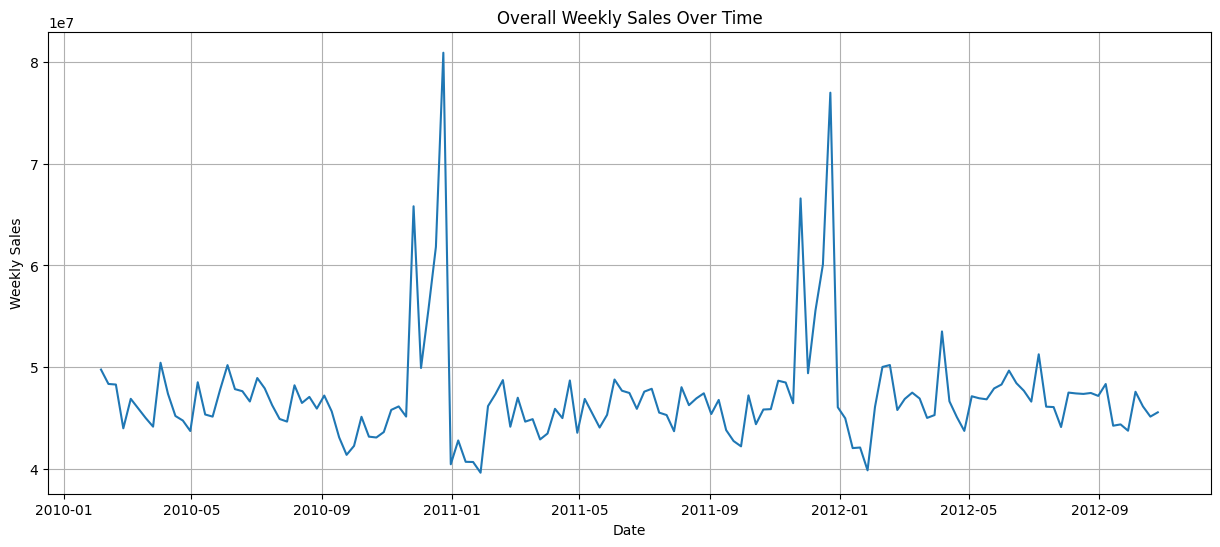

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and sum Weekly_Sales to get overall weekly sales
weekly_sales_overall = merged_train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot overall weekly sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_sales_overall, x='Date', y='Weekly_Sales')
plt.title('Overall Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [1]:
# Analyze sales during holiday vs. non-holiday weeks
holiday_sales = merged_train_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

NameError: name 'merged_train_df' is not defined